Import some important libraries to use.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import sweetviz as sv
from sklearn import linear_model
from sklearn.model_selection import train_test_split 
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objs as go
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import os
import seaborn as sns
%matplotlib inline
from datetime import datetime

C:\NiksBot\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



Downloading dataset from the github folder. here we have 5 csv file containing data fir Uber and lyf cab ride.
So, we download all 4 files and merge into one dataframe called "car_ride_df0". Which is our main data frame. 
we do have other file called 'weather.csv' and we will set those data into "weather_df".

In [2]:
# Importing dataset from git
car_ride_arr = ["cab_rides_1.csv","cab_rides_2.csv","cab_rides_3.csv","cab_rides_4.csv"]
car_ride_df0 = pd.DataFrame()
for i in car_ride_arr:
    df = pd.DataFrame()
    url = "https://raw.githubusercontent.com/Nikpatel30/AI_ALGO_Final_Project/main/Data%20Acquisition%20%26%20Understanding/" + i
    print("Fetching data from " + url)
    df = pd.read_csv(url, error_bad_lines=False) 
    car_ride_df0 = pd.concat([car_ride_df0,df])
    print("=== Data successfully appended ===")

Fetching data from https://raw.githubusercontent.com/Nikpatel30/AI_ALGO_Final_Project/main/Data%20Acquisition%20%26%20Understanding/cab_rides_1.csv
=== Data successfully appended ===
Fetching data from https://raw.githubusercontent.com/Nikpatel30/AI_ALGO_Final_Project/main/Data%20Acquisition%20%26%20Understanding/cab_rides_2.csv
=== Data successfully appended ===
Fetching data from https://raw.githubusercontent.com/Nikpatel30/AI_ALGO_Final_Project/main/Data%20Acquisition%20%26%20Understanding/cab_rides_3.csv
=== Data successfully appended ===
Fetching data from https://raw.githubusercontent.com/Nikpatel30/AI_ALGO_Final_Project/main/Data%20Acquisition%20%26%20Understanding/cab_rides_4.csv
=== Data successfully appended ===


In [29]:
car_ride_df = car_ride_df0 #Assign to another dataframe for future scope and Printing our main car ride dataset
car_ride_df

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1.543280e+12,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1.543370e+12,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1.543550e+12,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1.543460e+12,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
229942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
229943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
229944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
229945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
#below is url for weather.csv file
url = "https://raw.githubusercontent.com/Nikpatel30/AI_ALGO_Final_Project/main/Data%20Acquisition%20%26%20Understanding/weather.csv"
weather_df0 = pd.read_csv(url, error_bad_lines=False) 

In [31]:
weather_df = weather_df0
weather_df

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49
...,...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,NaN,1543819974,0.96,1.52
6272,44.85,Northeastern University,0.88,1000.71,NaN,1543819974,0.96,1.54
6273,44.82,South Station,0.89,1000.70,NaN,1543819974,0.96,1.54
6274,44.78,Theatre District,0.89,1000.70,NaN,1543819974,0.96,1.54


Here, we are only working on car_ride_df dataset, to see some insight and see what we have in our data.

In [32]:
car_ride_df.shape

(693017, 10)

In [33]:
car_ride_df.describe()

,distance,time_stamp,price,surge_multiplier
count,663070.000000,6.630700e+05,610381.000000,663070.000000
mean,2.188727,1.544046e+12,16.543457,1.013854
std,1.138801,6.893010e+08,9.324696,0.091662
min,0.020000,1.543200e+12,2.500000,1.000000
25%,1.270000,1.543440e+12,9.000000,1.000000
50%,2.160000,1.543740e+12,13.500000,1.000000
75%,2.920000,1.544830e+12,22.500000,1.000000
max,7.860000,1.545160e+12,97.500000,3.000000


somehow, we got 83k blank rows in our dataset, so we will remove this rows.

In [34]:
total = car_ride_df.isnull().sum().sort_values(ascending=False)
total

price               82636
name                29947
product_id          29947
id                  29947
surge_multiplier    29947
source              29947
destination         29947
time_stamp          29947
cab_type            29947
distance            29947
dtype: int64

Here we remove empty rows from the dataframe, which area almost around 83k.

In [35]:
car_ride_df = car_ride_df.dropna()
car_ride_df.shape

(610381, 10)

In [36]:
cols = ['destination', 'source', 'cab_type', 'name']
l = []
for col in cols:
    print("Unique value of " + col)
    print(len(car_ride_df[col].unique()))
    l.append(car_ride_df[col].unique())
print(l)

Unique value of destination
12
Unique value of source
12
Unique value of cab_type
2
Unique value of name
12
[array(['North Station', 'Northeastern University', 'West End',
       'Haymarket Square', 'South Station', 'Fenway', 'Theatre District',
       'Beacon Hill', 'Back Bay', 'North End', 'Financial District',
       'Boston University'], dtype=object), array(['Haymarket Square', 'Back Bay', 'North End', 'North Station',
       'Beacon Hill', 'Boston University', 'Fenway', 'South Station',
       'Theatre District', 'West End', 'Financial District',
       'Northeastern University'], dtype=object), array(['Lyft', 'Uber'], dtype=object), array(['Shared', 'Lux', 'Lyft', 'Lux Black XL', 'Lyft XL', 'Lux Black',
       'UberXL', 'Black', 'UberX', 'WAV', 'Black SUV', 'UberPool'],
      dtype=object)]


Check how many total number station we have. Here we compare destination and source list if they are same that means we have 12 staion.
Here we got 'True' that means we have data of 12 station only.

In [37]:
if(l[0].sort() == l[1].sort()):
    print("True")

True


In [38]:

car_ride_df['date_time'] = car_ride_df['time_stamp'].map(lambda x: datetime.utcfromtimestamp(int(x) / 1000).strftime('%Y-%m-%d %H'))
car_ride_df                                                                                                     

C:\NiksBot\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date_time
0,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 08
1,0.44,Lyft,1.543280e+12,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 00
2,0.44,Lyft,1.543370e+12,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,2018-11-28 01
3,0.44,Lyft,1.543550e+12,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-11-30 03
4,0.44,Lyft,1.543460e+12,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,2018-11-29 02
...,...,...,...,...,...,...,...,...,...,...,...
199994,3.15,Uber,1.543420e+12,Northeastern University,West End,26.5,1.0,6b9cc736-3728-4f5e-b962-dbc8cd5c382b,6c84fd89-3f11-4782-9b50-97c468b19529,Black,2018-11-28 15
199996,3.15,Uber,1.543420e+12,Northeastern University,West End,17.0,1.0,a4ab6332-1736-422d-8ea6-920be0fe7828,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,2018-11-28 15
199997,3.15,Uber,1.544760e+12,Northeastern University,West End,10.5,1.0,c113bc8a-c49e-4e38-b500-1eae76219a5a,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,2018-12-14 04
199998,3.15,Uber,1.544760e+12,Northeastern University,West End,10.5,1.0,c1162a0f-1599-401e-bd04-4721c5beb3f5,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,2018-12-14 04


In [39]:
car_ride_df['ymd'] = car_ride_df['time_stamp'].map(lambda x: datetime.utcfromtimestamp(int(x) / 1000).strftime('%Y %m %d'))
car_ride_df['hour'] = car_ride_df['time_stamp'].map(lambda x: datetime.utcfromtimestamp(int(x) / 1000).strftime('%H'))
car_ride_df  

C:\NiksBot\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\NiksBot\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date_time,ymd,hour
0,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 08,2018 12 16,08
1,0.44,Lyft,1.543280e+12,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 00,2018 11 27,00
2,0.44,Lyft,1.543370e+12,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,2018-11-28 01,2018 11 28,01
3,0.44,Lyft,1.543550e+12,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-11-30 03,2018 11 30,03
4,0.44,Lyft,1.543460e+12,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,2018-11-29 02,2018 11 29,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,3.15,Uber,1.543420e+12,Northeastern University,West End,26.5,1.0,6b9cc736-3728-4f5e-b962-dbc8cd5c382b,6c84fd89-3f11-4782-9b50-97c468b19529,Black,2018-11-28 15,2018 11 28,15
199996,3.15,Uber,1.543420e+12,Northeastern University,West End,17.0,1.0,a4ab6332-1736-422d-8ea6-920be0fe7828,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,2018-11-28 15,2018 11 28,15
199997,3.15,Uber,1.544760e+12,Northeastern University,West End,10.5,1.0,c113bc8a-c49e-4e38-b500-1eae76219a5a,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,2018-12-14 04,2018 12 14,04
199998,3.15,Uber,1.544760e+12,Northeastern University,West End,10.5,1.0,c1162a0f-1599-401e-bd04-4721c5beb3f5,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,2018-12-14 04,2018 12 14,04


The data is from nov 26, 2018 to dec 12, 2018. and we have data for different time too.

In [40]:
for i in car_ride_df[car_ride_df.columns[-2:]]:
    print(i)
    l = car_ride_df[i].unique()
    print(len(l))
    print(np.sort(l))

ymd
16
['2018 11 26' '2018 11 27' '2018 11 28' '2018 11 29' '2018 11 30'
 '2018 12 01' '2018 12 02' '2018 12 03' '2018 12 04' '2018 12 10'
 '2018 12 13' '2018 12 14' '2018 12 15' '2018 12 16' '2018 12 17'
 '2018 12 18']
hour
24
['00' '01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13'
 '14' '15' '16' '17' '18' '19' '20' '21' '22' '23']


set the figure size of seaborn graphs to 10*7.

In [41]:
sns.set(rc= {'figure.figsize': (10,7)})

It is clear that, we have almost equal data for both company.

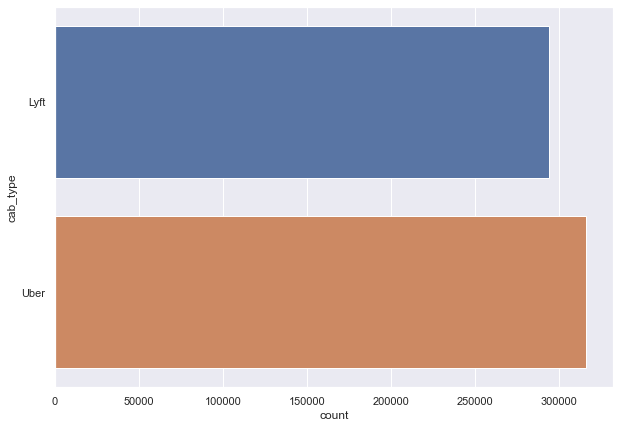

In [42]:
sns.countplot(y = 'cab_type', data =car_ride_df )

There are some days where surge multiplier go higher to 3. That means on that day the price goes high for any ride.

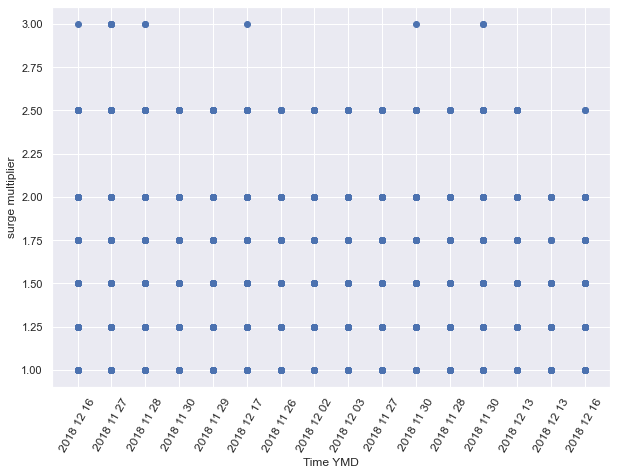

In [43]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x = car_ride_df['ymd'], y = car_ride_df['surge_multiplier'])
ax.set_xticklabels(car_ride_df['ymd'],rotation = 60, fontsize = 'medium')
ax.set_xlabel("Time YMD")
ax.set_ylabel("surge multiplier")
plt.show()

The Price variation of a day is between 0 to 100, most of the day has maximum fair price >90.

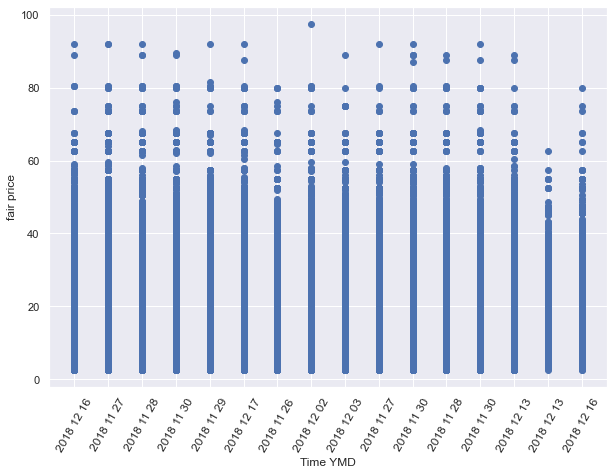

In [44]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x = car_ride_df['ymd'], y = car_ride_df['price'])
ax.set_xticklabels(car_ride_df['ymd'],rotation = 60, fontsize = 'medium')
ax.set_xlabel("Time YMD")
ax.set_ylabel("fair price")
plt.show()

Creating bins for distance variable, with 0.5 increment. i.e distance in 0 - 0.5 will be converted into 0.5. 
Here we created in total 16 bins.

In [45]:
car_ride_df['distance'].unique()
bins = np.arange(0,8.5, 0.5)
l  = bins[1:].tolist()
car_ride_df['dist_bin'] = pd.cut(car_ride_df['distance'], bins , labels = l)
car_ride_df['dist_bin'].unique()

C:\NiksBot\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[0.5, 1.5, 1.0, 2.5, 3.5, ..., 5.5, 6.0, 6.5, 7.0, 8.0]
Length: 16
Categories (16, float64): [0.5 < 1.0 < 1.5 < 2.0 ... 6.5 < 7.0 < 7.5 < 8.0]

We are taking mean price over distance and see how much increment comes when distance increases.
some intresting insight can be seen in the graph, that the price increase gradually till 6 km ride after that, there is price drop if travel more than 6.5 km.

   dist_bin  distance    time_stamp      price  surge_multiplier
0       0.5  0.427176  1.544043e+12  12.302246          1.006518
1       1.0  0.724533  1.544047e+12  12.689302          1.008668
2       1.5  1.254970  1.544042e+12  13.612354          1.013570
3       2.0  1.722448  1.544043e+12  15.188684          1.014339
4       2.5  2.304090  1.544049e+12  16.752087          1.017362
5       3.0  2.765022  1.544049e+12  18.033705          1.016381
6       3.5  3.199727  1.544042e+12  19.633113          1.018038
7       4.0  3.667270  1.544050e+12  21.719663          1.020159
8       4.5  4.371133  1.544056e+12  23.469808          1.022803
9       5.0  4.638052  1.544065e+12  23.627947          1.019650
10      5.5  5.319493  1.544014e+12  26.951807          1.019964
11      6.0  5.606472  1.544087e+12  25.625772          1.000000
12      6.5  6.251848  1.544085e+12  23.647867          1.001185
13      7.0  6.918679  1.543863e+12  26.981132          1.000000
14      7.5  7.412678  1.

Text(0.5, 0, 'Distance')

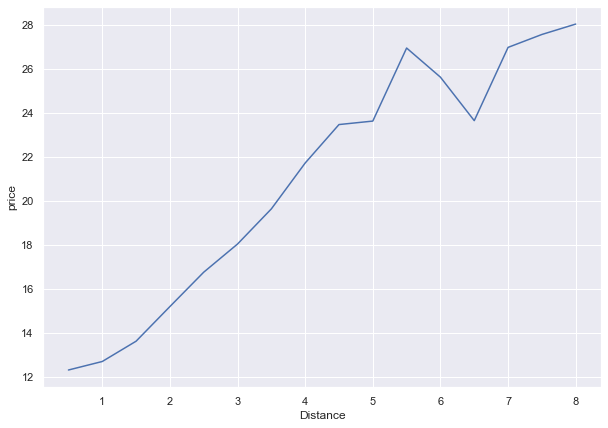

In [46]:
df1 = car_ride_df.groupby(['dist_bin']).mean(['price']).reset_index()
print(df1)
sns.lineplot(x = 'dist_bin', y = 'price',data = df1)
plt.xlabel("Distance")

In [47]:
weather_df = weather_df.rename(columns = {'location':'source'})
weather_df

,temp,source,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49
...,...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,NaN,1543819974,0.96,1.52
6272,44.85,Northeastern University,0.88,1000.71,NaN,1543819974,0.96,1.54
6273,44.82,South Station,0.89,1000.70,NaN,1543819974,0.96,1.54
6274,44.78,Theatre District,0.89,1000.70,NaN,1543819974,0.96,1.54


In [48]:
weather_df['date_time'] = weather_df['time_stamp'].map(lambda x: datetime.utcfromtimestamp(int(x)).strftime('%Y-%m-%d %H'))
weather_df 

,temp,source,clouds,pressure,rain,time_stamp,humidity,wind,date_time
0,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25,2018-12-16 23
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32,2018-12-16 23
2,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07,2018-12-16 23
3,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09,2018-12-16 23
4,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49,2018-12-16 23
...,...,...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,NaN,1543819974,0.96,1.52,2018-12-03 06
6272,44.85,Northeastern University,0.88,1000.71,NaN,1543819974,0.96,1.54,2018-12-03 06
6273,44.82,South Station,0.89,1000.70,NaN,1543819974,0.96,1.54,2018-12-03 06
6274,44.78,Theatre District,0.89,1000.70,NaN,1543819974,0.96,1.54,2018-12-03 06


In [22]:
car_ride_df

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date_time,ymd,hour,dist_bin
0,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 08:46,2018 12 16,08,0.5
1,0.44,Lyft,1.543280e+12,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 00:53,2018 11 27,00,0.5
2,0.44,Lyft,1.543370e+12,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,2018-11-28 01:53,2018 11 28,01,0.5
3,0.44,Lyft,1.543550e+12,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-11-30 03:53,2018 11 30,03,0.5
4,0.44,Lyft,1.543460e+12,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,2018-11-29 02:53,2018 11 29,02,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,3.15,Uber,1.543420e+12,Northeastern University,West End,26.5,1.0,6b9cc736-3728-4f5e-b962-dbc8cd5c382b,6c84fd89-3f11-4782-9b50-97c468b19529,Black,2018-11-28 15:46,2018 11 28,15,3.5
199996,3.15,Uber,1.543420e+12,Northeastern University,West End,17.0,1.0,a4ab6332-1736-422d-8ea6-920be0fe7828,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,2018-11-28 15:46,2018 11 28,15,3.5
199997,3.15,Uber,1.544760e+12,Northeastern University,West End,10.5,1.0,c113bc8a-c49e-4e38-b500-1eae76219a5a,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,2018-12-14 04:00,2018 12 14,04,3.5
199998,3.15,Uber,1.544760e+12,Northeastern University,West End,10.5,1.0,c1162a0f-1599-401e-bd04-4721c5beb3f5,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,2018-12-14 04:00,2018 12 14,04,3.5


join Two tables using left join.

In [56]:
res = pd.merge(car_ride_df, weather_df, on = ['source','date_time'], how = 'left')
res

,distance,cab_type,time_stamp_x,destination,source,price,surge_multiplier,id,product_id,name,...,ymd,hour,dist_bin,temp,clouds,pressure,rain,time_stamp_y,humidity,wind
0,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,2018 12 16,08,0.5,39.36,0.39,1022.44,NaN,1.544950e+09,0.74,8.14
1,0.44,Lyft,1.543280e+12,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,2018 11 27,00,0.5,43.94,1.00,1006.29,0.0425,1.543278e+09,0.90,10.12
2,0.44,Lyft,1.543280e+12,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,2018 11 27,00,0.5,43.76,0.97,1005.94,0.1390,1.543279e+09,0.92,11.22
3,0.44,Lyft,1.543280e+12,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,2018 11 27,00,0.5,43.79,0.98,1006.14,0.2122,1.543280e+09,0.91,9.79
4,0.44,Lyft,1.543280e+12,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,2018 11 27,00,0.5,43.76,0.97,1005.93,0.2318,1.543279e+09,0.92,11.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119281,3.15,Uber,1.543420e+12,Northeastern University,West End,17.0,1.0,a4ab6332-1736-422d-8ea6-920be0fe7828,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,...,2018 11 28,15,3.5,39.60,0.27,991.76,NaN,1.543418e+09,0.65,8.31
1119282,3.15,Uber,1.543420e+12,Northeastern University,West End,17.0,1.0,a4ab6332-1736-422d-8ea6-920be0fe7828,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,...,2018 11 28,15,3.5,39.85,0.32,992.08,NaN,1.543419e+09,0.66,10.64
1119283,3.15,Uber,1.544760e+12,Northeastern University,West End,10.5,1.0,c113bc8a-c49e-4e38-b500-1eae76219a5a,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,...,2018 12 14,04,3.5,29.47,0.73,1034.78,NaN,1.544763e+09,0.72,1.37
1119284,3.15,Uber,1.544760e+12,Northeastern University,West End,10.5,1.0,c1162a0f-1599-401e-bd04-4721c5beb3f5,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,...,2018 12 14,04,3.5,29.47,0.73,1034.78,NaN,1.544763e+09,0.72,1.37
